# Two sets of Fluxonium with a Tmon qubit

# Ec for the FX is 1.00GHz.
# And LP's are 200nm.

## Design&LOM&GDS

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.tmon import Tmon

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'  # our substrate is Silicon
# cpw_width and cpw_gap is defined from the beginnning if you need you can 
# change it later. But with this way one can be sure all the lines are having same width and gap.
design.variables['cpw_width'] = '15 um'  
design.variables['cpw_gap'] = '8.733 um'  
design._chips['main']['size']['size_x'] = '9mm'  # Our device size is 9*9mm
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True


eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d

# run the GUI 
gui = MetalGUI(design)

In [7]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.tmon import Tmon

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =270, pos_x = '-2.2mm', pos_y = '-0.8mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))


# Q2 details
options = dict(chip='main', 
            orientation =90, pos_x = '-2.35mm', pos_y = '0.0mm',
               pad_head_width='60um', jj_gap ='30um',
        pad_head_length='400um',
        pad_arm_width='60um',
        pad_arm_lenght='600um',
        palm_radius='60um',
        pad_gap='80um',
              gds_cell_name=gds_cell_name_jj,
                             
    flux_bias_line_options=Dict(make_fbl = True, fbl_sep='55um',
            ), 
     )
               
q2 = Tmon(design,'Q2', options = dict(
             **options))

# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.8mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))


gui.rebuild()

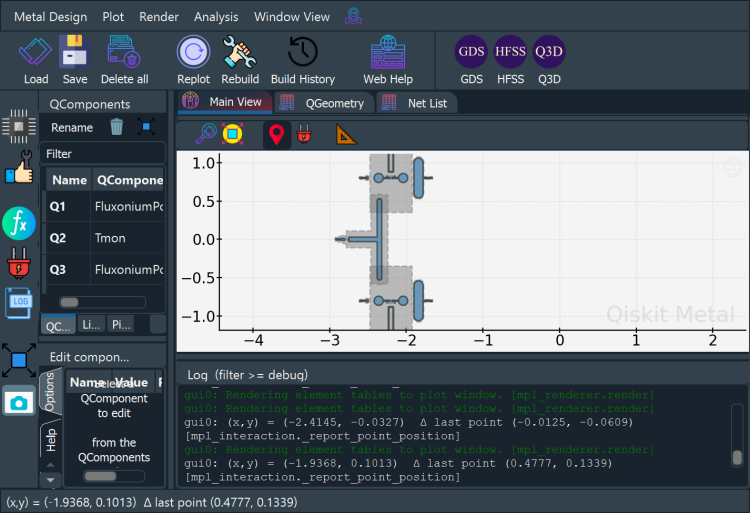

In [8]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [9]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-0.8mm',                     
  'orientation'       : 270,                          
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'pad_width'         : '15um',                       
  'pad_height'        : '100um',                      
  'pad_radius'        : '60um',                       
  'l_width'           : '1um',                        
  'l_length'          : '100um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'L_j'               : '34.38nH',                    
  'pocket_width'      : '900um',                      
  'pocket_hei

# The Maxwell Capacitance Matirx for 2FX and 1Tmon

In [10]:
#from qiskit_metal.analyses.quantization.lumped_oscillator_model_FX import LOManalysis_FX
from qiskit_metal.analyses.quantization import LOManalysis

c1 = LOManalysis(design, "q3d")

In [11]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [12]:
# for second method. dont run this
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

## Let's calculate the total capacitance and the charging energy for Tmon. Because for FX, these are already known. 

In [13]:
c1.sim.run(components=[('Q2')], open_terminations=[('Q2', 'flux_bias_line')])
c1.sim.capacitance_matrix

INFO 06:26PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:26PM [load_ansys_project]: 	Opened Ansys App
INFO 06:26PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 06:26PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project47
INFO 06:26PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 06:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:26PM [connect]: 	Connected to project "Project47" and design "FluxoniumEPR_hfss" 😀 

INFO 06:26PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
WARNING 06:26PM [connect_setup]: 	No design setup detected.
WARNING 06:26PM [connect_setup]: 	Creating Q3D default setup.
INFO 06:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 06:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
IN

,flux_bias_line_Q2,ground_main_plane,tmon_Q2
flux_bias_line_Q2,20.39302,-19.25176,-1.05317
ground_main_plane,-19.25176,274.73011,-183.32406
tmon_Q2,-1.05317,-183.32406,189.28690


In [14]:
# Total Capacitance for Tmon

Cflux_pad = 1.31313
C_pad = 183.32406


Csigma2 = C_pad*Cflux_pad/(C_pad+Cflux_pad)
Csigma = C_pad

print('Total Capacitance:', Csigma, 'fF')

Total Capacitance: 183.32406 fF


In [15]:
# Charging energy of Tmon

e = 1.60217663e-19 
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')

Charging Energy: 105.6611400855102 MHz


In [19]:
# Tmon Ej/EC

Ec = 105.661
Ej = 14580 #unit is MHz so, it is Ej/2pi
a= Ej/Ec

print('a:', Ej/Ec, 'GHz')

a: 137.9884725679295 GHz


## The FX qubit part

In [14]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'charge_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 04:13PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 04:14PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:14PM [analyze]: Analyzing setup Setup
INFO 04:17PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmphl45mbpu.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 04:17PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpbualzjxr.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 04:17PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpylqss25r.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 04:17PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp16ewqils.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSi

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,22.19804,-0.12070,-21.17830,-0.60199,-0.06797,-0.04608
flux_bias_line_Q1,-0.12070,59.09828,-45.19757,-4.80972,-4.77569,-2.19276
ground_main_plane,-21.17830,-45.19757,348.87197,-25.61733,-21.80454,-166.44216
pad_bot_Q1,-0.60199,-4.80972,-25.61733,37.02389,-3.51838,-1.05786
pad_top_Q1,-0.06797,-4.77569,-21.80454,-3.51838,37.05940,-5.45523
readout_padNline_Q1,-0.04608,-2.19276,-166.44216,-1.05786,-5.45523,177.56766


In [ ]:
# capacitance with pocket-height=650um

Cpad_top = 25.61395
Cpad_bot = 21.79921
Creadout_bot = 5.45500
Creadout_top = 1.05780
Ccharge_top = 0.60025
Cfluxpad_top = 4.80577
Cfluxpad_bot = 4.77768

C_pads = 3.51689

C_top = Cpad_top + Ccharge_top + Cfluxpad_top + Creadout_top
C_bot = Cpad_bot + Creadout_bot + Cfluxpad_bot

Csigma = C_pads + C_top*C_bot/(C_top+C_bot)
print('Ctop:', C_top, 'fF')
print('Cbot:', C_bot, 'fF')
print('Total Capacitance:', Csigma, 'fF')

In [ ]:
import numpy as np
e = 1.60217663e-19
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')
print('E_c:', Ec, '...')

In [8]:
c1.sim.run(components=[('Q1'), ('Q2'), ('Q3')], open_terminations=[('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'charge_line'), ('Q1', 'readout_line'), ('Q2', 'flux_bias_line'), ('Q3', 'flux_bias_line'), ('Q3', 'fake_flux_bias_line'), ('Q3', 'charge_line'), ('Q3', 'readout_line'),])
c1.sim.capacitance_matrix

INFO 03:53PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:53PM [load_ansys_project]: 	Opened Ansys App
INFO 03:53PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 03:53PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project47
INFO 03:53PM [connect_design]: No active design found (or error getting active design).
INFO 03:53PM [connect]: 	 Connected to project "Project47". No design detected
INFO 03:53PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
WARNING 03:53PM [connect_setup]: 	No design setup detected.
WARNING 03:53PM [connect_setup]: 	Creating Q3D default setup.
INFO 03:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:53PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:53PM [analyze]: Analyzing setup Setup
INFO 03:58PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppDat

,charge_line_Q1,charge_line_Q3,flux_bias_line_Q1,flux_bias_line_Q2,flux_bias_line_Q3,ground_main_plane,pad_bot_Q1,pad_bot_Q3,pad_top_Q1,pad_top_Q3,readout_padNline_Q1,readout_padNline_Q3,tmon_Q2
charge_line_Q1,22.05061,-0.00034,-0.11181,-0.00099,-0.00189,-21.09104,-0.59601,-0.00149,-0.05507,-0.00200,-0.03973,-0.00197,-0.11073
charge_line_Q3,-0.00034,22.05065,-0.00191,-0.00096,-0.11169,-21.08978,-0.00200,-0.05508,-0.00149,-0.59570,-0.00198,-0.03971,-0.11075
flux_bias_line_Q1,-0.11181,-0.00191,59.19057,-0.00904,-0.02686,-45.52915,-4.70677,-0.02294,-4.71631,-0.02348,-2.09942,-0.04195,-0.93866
flux_bias_line_Q2,-0.00099,-0.00096,-0.00904,20.61835,-0.00898,-19.43721,-0.00944,-0.00822,-0.00830,-0.00948,-0.01095,-0.01087,-0.80505
flux_bias_line_Q3,-0.00189,-0.11169,-0.02686,-0.00898,59.19010,-45.50442,-0.02350,-4.71998,-0.02299,-4.70458,-0.04249,-2.10010,-0.93797
ground_main_plane,-21.09104,-21.08978,-45.52915,-19.43721,-45.50442,858.43680,-24.47545,-21.07232,-21.07891,-24.47329,-166.06966,-166.05369,-179.35619
pad_bot_Q1,-0.59601,-0.00200,-4.70677,-0.00944,-0.02350,-24.47545,37.18111,-0.01982,-3.40661,-0.02110,-0.92759,-0.03296,-2.02234
pad_bot_Q3,-0.00149,-0.05508,-0.02294,-0.00822,-4.71998,-21.07232,-0.01982,37.15216,-0.01995,-3.40705,-0.03435,-5.46531,-1.35851
pad_top_Q1,-0.05507,-0.00149,-4.71631,-0.00830,-0.02299,-21.07891,-3.40661,-0.01995,37.15216,-0.01983,-5.46642,-0.03416,-1.35906
pad_top_Q3,-0.00200,-0.59570,-0.02348,-0.00948,-4.70458,-24.47329,-0.02110,-3.40705,-0.01983,37.18067,-0.03306,-0.92653,-2.02188


In [32]:
gui.main_window.close()

True